## Text Analysis on Company Websites


```{yaml}
Course:   DS 5001 
Author:   Hyun Ko
Date:     May 5, 2023
```

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
OHCO = ['company_id', 'link_num', 'sent_num', 'token_num']
OHCO_DOCS = OHCO[:2]
OHCO_SENTS = OHCO[:3]
OHCO_TOKENS = OHCO[:4]

### Introduction

Today, a company's website is akin to a virtual storefront, providing customers with crucial information about its offerings. However, with the ever-increasing amount of data on these websites, analyzing thousands of companies belonging to a particular industry can be overwhelming. This makes it challenging for customers to gain a comprehensive understanding of the industry and each individual company.

Text analytics is a powerful tool that can offer valuable insights into analyzing the vast amount of data on company websites. Text analytics can help in various ways, from identifying similarities between companies to detecting whether a company exists in the real world or is generated by an algorithm like Chat GPT.

In this report, we focus on identifying the general characteristics of company websites and comparing them across companies that produce magnets under the same NAICS code. By doing so, we aim to gain a deeper understanding of the industry, its trends, and opportunities for growth.

### Source Data

The dataset we used is the scraped dataset of 1,227 companies that produce magnets. I used Python's BeautifulSoup package to scrpae the data. Since the raw dataset was overwhelming in size, I dropped outliers, links that contain words less than 15th percentile and more than 85th percentile. Then, I included links of 300 sampled companies. Consequently, I have obtained the final `CORPUS` with 2270 links of 300 companies.`CORPUS` was in `.csv` format, converted into Pandas dataframe. It contained total 4 columns: company_id, link_num (number of scraped links per company), text (scraped text of each link), and words (number of words per link). Ultimately, `CORPUS` was indexed by `company_id`.

In [25]:
CORPUS= pd.read_csv("data/CORPUS.csv", lineterminator='\n', index_col = "company_id")
CORPUS

,link_num,text,words
company_id,,,
1,0,Manufacturer ofMetal FastenersandGeneral Hardw...,150
1,1,404-Page Not Found Please check the URL for pr...,39
1,2,Buckles CMC specializes in design and manufact...,145
1,3,Clasps CMC specializes in design and manufactu...,105
1,4,Loop-Rings CMC specializes in design and manuf...,123
...,...,...,...
1219,10,PROTOTYPE TO PRODUCTION Magnesium Typical AZ...,13
1219,11,Contact What Are You Waiting For? Protocast I...,21
1222,0,HOME ABOUT PENTACAST SERVICES CONTACT More Pen...,47


According to the statistics, each company had the average 7.56 links and had 1098 words in total. There minimum and maximum number of links companies conatined were 1, and 66 resepctively. 

In [7]:
LIB = pd.read_csv("data/LIB.csv")
LIB

,company_num,total_words,total_links
0,1,2796,26
1,5,368,9
2,10,845,11
3,12,1194,7
4,14,682,3
...,...,...,...
295,1211,968,7
296,1212,372,3
297,1216,1948,9
298,1219,2084,12


In [24]:
LIB[['total_words', 'total_links']].describe()

,total_words,total_links
count,300.000000,300.000000
mean,1098.070000,7.566667
std,772.983456,7.625794
min,139.000000,1.000000
25%,454.250000,3.000000
50%,884.000000,5.500000
75%,1554.250000,9.000000
max,3201.000000,66.000000


Below graph shows the distribution of total words and total links per company.

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_links'>

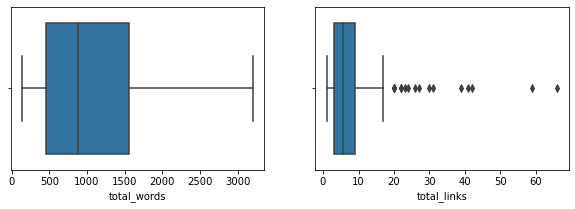

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

sns.boxplot(LIB['total_words'], ax = ax[0])
sns.boxplot(LIB['total_links'], ax = ax[1])

Based on `CORPUS` table, I generated `SENTS`, `TOKENS`, `VOCAB`, `DOCS` AND `TFIDF` table. For the ease of analysis, I included only nouns and dropped ther rest of `pos`.

In [30]:
SENTS = pd.read_csv("data/SENTS.csv", lineterminator='\n', index_col = OHCO_SENTS)
SENTS

sent_str
company_id link_num sent_num                                                   
1          0        0         Manufacturer ofMetal FastenersandGeneral Hardw...
                    1         (CMC) specializes in the design, manufacture a...
                    2          Items are available in Zinc, Brass, and Steel...
                    3          Most items are made in the USA, are Berry Ame...
                    4          Ask us aboutCustom Fabricated Partsmade to yo...
...                                                                         ...
1222       2        6                                   © 2017 by PentaCast Inc
                    7                                                       Tel
                    8                                                       519
                    9                                                       245
                    10                                                    4970 

[25967 rows x 1 columns]

In [31]:
TOKENS = pd.read_csv("data/TOKENS.csv", lineterminator='\n', index_col = OHCO_TOKENS)
TOKENS

pos_tuple  pos  \
company_id link_num sent_num token_num                                 
1          0        0        0          ('Manufacturer', 'NNP')  NNP   
                             3              ('Hardware', 'NNP')  NNP   
                             4                ('Custom', 'NNP')  NNP   
                             5                 ('Metal', 'NNP')  NNP   
                             6              ('Crafters', 'NNP')  NNP   
...                                                         ...  ...   
1222       2        4        0                ('Success', 'NN')   NN   
                    5        1                ('message', 'NN')   NN   
                    6        3             ('PentaCast', 'NNP')  NNP   
                             4                   ('Inc', 'NNP')  NNP   
                    7        0                    ('Tel', 'NN')   NN   

                                           token_str      term_str  
company_id link_num sent_num token_num                              
1          0        0        0          Manufacturer  manufacturer  
                             3              Hardware      hardware  
                             4                Custom        custom  
                             5                 Metal         metal  
                             6              Crafters      crafters  
...                                              ...           ...  
1222       2        4        0               Success       success  
                    5        1               message       message  
                    6        3             PentaCast     pentacast  
                             4                   Inc           inc  
                    7        0                   Tel           tel  

[144151 rows x 4 columns]

In [33]:
VOCAB = pd.read_csv("data/VOCAB.csv", lineterminator='\n')
VOCAB

,term_str,n,p,i,n_chars,max_pos,n_pos,cat_pos,dfidf,mean_tfidf
0,quality,1369,0.009497,6.718315,7,NN,3,"{'NNS', 'NNP', 'NN'}",22.920115,0.020423
1,castings,1228,0.008519,6.875126,8,NNS,3,"{'NNS', 'NNP', 'NNPS'}",44.741763,0.056828
2,products,1199,0.008318,6.909605,8,NNS,4,"{'NNS', 'NNP', 'NN', 'NNPS'}",33.358238,0.024701
3,casting,1194,0.008283,6.915634,7,NNP,2,"{'NNP', 'NN'}",45.154499,0.051122
4,contact,944,0.006549,7.254578,7,NNP,2,"{'NNP', 'NN'}",35.475367,0.022390
...,...,...,...,...,...,...,...,...,...,...
12646,beane,1,0.000007,17.137221,5,NNP,1,{'NNP'},2.477121,0.000550
12647,lucas,1,0.000007,17.137221,5,NNP,1,{'NNP'},2.477121,0.000550
12648,hernandez,1,0.000007,17.137221,9,NNP,1,{'NNP'},2.477121,0.000550
12649,enrique,1,0.000007,17.137221,7,NNP,1,{'NNP'},2.477121,0.000550


In [37]:
DOCS = pd.read_csv("data/DOCS.csv", lineterminator='\n', index_col = OHCO_DOCS)
DOCS

doc_str
company_id link_num                                                   
1          0         manufacturer hardware custom metal crafters wa...
           1         found please url spelling capitalization troub...
           2         buckles cmc design manufacturing standard cust...
           3         clasps cmc design manufacturing standard custo...
           4         cmc design manufacturing standard custom loop ...
...                                                                ...
1219       10        prototype to production magnesium typical prop...
           11        are protocast inc p e avecommerce city made in...
1222       0         home about pentacast services contact more pen...
           1         home about pentacast services contact more ser...
           2         home about pentacast services contact more con...

[2263 rows x 1 columns]

In [39]:
TFIDF = pd.read_csv("data/TFIDF.csv", index_col = 'company_id')
TFIDF

,today,machine,work,steel,variety,email,cast,engineering,inc,range,...,oems,forge,july,gate,jet,footprint,j,flange,resume,contractors
company_id,,,,,,,,,,,,,,,,,,,,,
1,-0.011544,-0.017719,-0.012737,0.071572,0.066224,0.088042,0.162926,-0.015846,0.113212,-0.011010,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,-0.001975,-0.002617,-0.008426,-0.002221,0.021561
5,-0.011544,-0.017719,-0.012737,0.086841,-0.008526,-0.019116,-0.021139,0.022513,-0.032783,0.059059,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,-0.001975,-0.002617,-0.008426,-0.002221,-0.002626
10,0.054641,-0.017719,-0.012737,-0.022144,-0.008526,-0.019116,0.189705,0.006824,-0.032783,0.051106,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,-0.001975,-0.002617,-0.008426,-0.002221,-0.002626
12,-0.011544,-0.017719,-0.012737,-0.022144,0.029331,0.065305,0.026666,-0.015846,-0.032783,-0.011010,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,-0.001975,-0.002617,-0.008426,-0.002221,-0.002626
14,-0.011544,-0.017719,-0.012737,-0.022144,-0.008526,-0.019116,0.000031,0.006916,-0.032783,-0.011010,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,-0.001975,-0.002617,-0.008426,-0.002221,-0.002626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,0.003521,-0.002653,0.002329,-0.022144,-0.008526,-0.019116,-0.021139,0.030597,-0.032783,-0.011010,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,-0.001975,-0.002617,-0.008426,-0.002221,-0.002626
1212,-0.011544,-0.017719,-0.012737,-0.022144,-0.008526,-0.019116,-0.021139,0.012510,-0.032783,-0.011010,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,-0.001975,-0.002617,-0.008426,-0.002221,-0.002626
1216,-0.011544,-0.017719,-0.012737,-0.014488,-0.008526,0.109865,-0.021139,-0.015846,-0.025399,-0.011010,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,0.023714,-0.002617,-0.008426,-0.002221,-0.002626


### PCA

Principal Component Analysis (PCA) is a useful technique for gaining an understanding of the underlying structure of company websites. By analyzing the word distributions of each principal component, we can see that these components are primarily composed of two types of words: website configuration-related words and product-related words.

Specifically, when examining PC0, we can observe that the `pos` column is predominantly composed of website configuration-related words, whereas the `neg` column is mostly comprised of product-related words.

<img src= "pics/PCA_0.png">

The loadings plot is an effective tool for visualizing the two axes of company websites. Specifically, the right half of the plot is characterized by words related to website configuration, including cookies, domain, data, information, and policy. In contrast, the left half of the plot is associated with product-related words, such as casting, aluminum, mold, and sand.

<img src = "pics/PCA_2.png">

The plot below provides an interesting insight into the relationship between the number of links on a company's website (size of a dot) and the content of that website. Specifically, the size of each dot on the plot, which is projected onto PC0 and PC1, is proportional to the number of links on the website. As the value of PC0 increases, so does the size of the dot, indicating that companies with more links are more likely to have website-configuration-related content.

Most companies in the magnets manufacturing industry tend to focus on their products and capabilities, which occupy a relatively small portion of their websites. Instead, the majority of their websites contain non-product-related information such as contact pages, board of directors, privacy notices, and protocols. This trend is clearly visible in the plot.

However, there are some exceptions to this trend, as evidenced by the smaller dots on the far-right side of the plot. Although companies with more links tend to have more non-product-related information on their websites, this is not always the case. There may be several reasons for this, such as different configuration settings or privacy protocols that hinder automatic web scraping. Therefore, there is significant variance in the number and type of links that are scraped for different companies.

<img src = "pics/PCA_1.png">

### Word Embedding

Word Embedding well captures the relationship between words within the corpus. Since I got to know that two principal components of the corpus, website configurations and products, I tried word embeddings to check whether the model identifies the difference between the hetergeneous axes. 

Here are the hyperparameters I used for modeling: `window = 5`, `vector_size = 50`, `min_count = 20`, `workers = 4`. Since copany websites are limited in the variety of topics, I set decreased `vector_size` so as not to overfit to the semantic meaning of each word.

According to the t-SNE plot below, in line with the result from PCA, we can find two salient clusters. On the top left region, most of the words are related to manufacture, such as aluminum, casting, steel, and brass. On the other hand, on the bottom right, words are more likely to website configurations information, privacy, and data.

<img src = 'pics/EMBEDDING_1.png'>

In order to find the hierarchy of words, I added clustering plots. Evidently, two huge clusters are observed in this plot. 

<img src = 'pics/EMBEDDING_2.png'>

### Sentiment Analysis

Company websites are tend to be written in a plain and formal language, therefore it is hard to figure emotional fluctuation within the text. Rather than capturing the negative emotion, I ran sentiment analysis to identify how much of positive emotion, such as trust, anticiaption, and joy, is embedded within company websites.

In order to check the general distribution of emotion, I calculated the mean of emotion of all companies. My initial expectation was true in general, the dominant emotion was trust and anticiaption. It was surprising sadness and fear were also on well observed in the corpus.

<img src="pics/SENTIMENT_1.png">

Rather than the orthodox visualiziation technique to display the words belong to each emotion, I used wordcloud: https://www.freewordcloudgenerator.com/

In this plot, I visualized the words of `company_id = 858`, the company marked the highest on anger. However, it is hard to find any word related to anger at all. It is presumed to be word 'cut', because in real world, 'cut' is ambivalent word. It can be a threat to a person, while in our context, we cut materials to product magnets. 

<img src = 'pics/WORDCLOUD_ANGER.jpeg'>

In this plot, I visualized the words of `company_id = 284`, the company marked the highest on anticipation. However, the words with big font mostly about the company name and irrelvant with our context, such as artworks, studio, and art.

<img src = "pics/WORDCLOUD_ANTICIAPTION.png">

In this plot, I visualized the words of `company_id = 5`, the company marked the highest on trust. Some words had linkage with trust: information, contact, service, tolerances, manufacturing, and quality. However, they did not appear frequently to embed trust, compared to words in huge font: noblitt, blog, fabrication, fabricating.

<img src = "pics/WORDCLOUD_TRUST.png">

## Conclusion

This project was able to explore the general content of company websites manufacturing magnets.

In terms of PCA, we had two main axes comprising company websites: products and website configuration. Also, the more links a website had, the more it is likely to contain website configuration related content. Conversely, the less a website had, the more likely it is likely to have product related content.

The result of word embedding did align with PCA. The t-SNE plot clearly displays the disparity between two topics, on the top left, there existed a cluster mostly comprised of production related words. On the bottom right, there was a cluster for website related words. 


For sentiment analysis, I initially expected trust and anticipation would be the dominant emotion, which was proved by the mean emotion of all companies. However, when I dived deep into a company level using wordcloud, the word combinations were not relevant with the emotion itself, for anger, turst, and anticiapation.

Overall, I was able to observe the two semantic axes within company websites through PCA and word embedding. However, there is a lot to be desired in this project. Since there is no direct or chronological order within company websites, unlike novels, it was impossible to capture the sequential order of emotion and plot. Also, the majority of links within company webistes are laid out in keywords, which means that there is no linkage between links. Accordingly, it was difficult to detect the connection bewteen them. 